<a href="https://colab.research.google.com/github/FaruqAlfa/PCVK-Pengolahan-Citra-Visi-Komputer-/blob/main/Kelompok_10_KUIS2_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok 10**

1. M. Abiyyu Arldana (2141720196)
2. Muhammad Akbar Nur Ihsan (2141720225)
3. Mukhamad Faruq Al Fahmi (2141720066)

## **KUIS 2**

1. Mengerjakan secara kelompok yang terdiri dari 3 anggota
2. Kumpulkan e-ktp anggota keluarga pada kelompok minimal 10 buah sebagai dataset.
3. Deteksi dan kenali foto wajah e-ktp tersebut menggunakan metode yang telah dipelajari baik pada matakulilah PCVK ataupun matakuliah lain pada semester ini.
4. Presentasikan di depan kelas hasil dari pekerjaan kelompok Anda, paparkan hasil dari pekerjaan tersebut secara detail lengkap dengan tangkapan layar bagian dari: (1)pre-processing, (2)lokalisasi, (3)segmentasi, dan (4)pengenalan.
5. Jangan lupa upload juga kode program tersebut pada repository
6. Kumpulkan link file presentasi dalam bentuk pdf dan link repository.

## **Import Folder dan Libaray**

In [42]:
# Mengakses folder di Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import os
import glob

## **Pre Processing**

In [44]:
def pathProcessing (path):
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif']  # Add more extensions if needed
    image_paths = []

    for ext in image_extensions:
        image_paths.extend(glob.glob(os.path.join(path, ext)))

    return image_paths

In [45]:
def readImage (paths):
    images=[]

    for path in paths:
        image= cv2.imread(path)
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to read image at path: {path}")

    return images

In [46]:
def show_images(images, num_cols=3):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 8))  # Atur ukuran figur sesuai kebutuhan

    for i, image in enumerate(images, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image, cmap='gray')  # Menggunakan cmap='gray' jika gambar dalam mode grayscale
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [47]:
paths = pathProcessing ('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/KUIS2/Data_KTP')

In [48]:
imgs = readImage(paths)

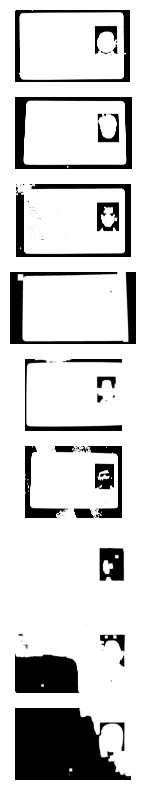

In [49]:
preprocessing=[]
for img in imgs:

  img_original = np.copy(img)

  # Apply Gaussian Blur
  blurred_img = cv2.GaussianBlur(img_original, (5, 5), 0.5)

  # Apply Erosion
  kernel_erosion = np.ones((3, 3), np.uint8)
  eroded_img = cv2.erode(blurred_img, kernel_erosion, iterations=1)

  # Apply Dilation
  kernel_dilation = np.ones((5, 5), np.uint8)
  dilated_img = cv2.dilate(eroded_img, kernel_dilation, iterations=10)

  # Apply Opening (Erosion followed by Dilation)
  kernel_opening = np.ones((5, 5), np.uint8)
  opening_img = cv2.morphologyEx(dilated_img, cv2.MORPH_OPEN, kernel_opening)

  gray = cv2.cvtColor(opening_img, cv2.COLOR_BGR2GRAY)

  # Otsu Thresholding
  _, otsu_thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  preprocessing.append(otsu_thresholded)
show_images(preprocessing,num_cols=1)

## **Lokalisasi**

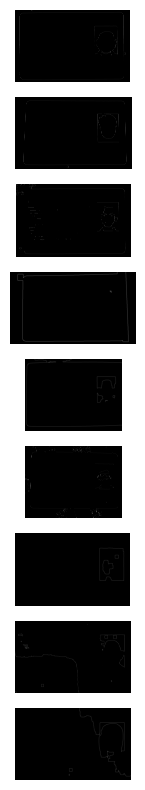

In [50]:
# Lokalisasi (Canny)
lokalisasi=[]
for image in preprocessing:
  edged = cv2.Canny(image, 50, 150)
  lokalisasi.append(edged)
show_images(lokalisasi,num_cols=1)

### **Face Detection**

In [51]:
faces = []
for image in imgs:

        mukaTamvan = cv2.CascadeClassifier('/content/drive/MyDrive/Semester_5/Pengolahan_Citra_Visi_Komputer/KUIS2/haarcascade_frontalface_alt.xml')
        roi_wajah = mukaTamvan.detectMultiScale(image)

        for (x, y, w, h) in roi_wajah:
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 10)  # Garis putih pada wajah

        faces.append(image)


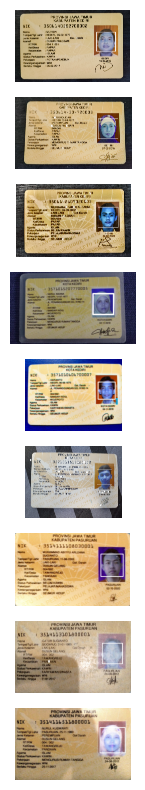

In [52]:
show_images(faces,num_cols=1)

In [53]:
def show_multiple_images(images_list, titles_list):
    num_cols = len(images_list)
    num_rows = max(len(images) for images in images_list)

    plt.figure(figsize=(10, 8))  # Sesuaikan ukuran figur sesuai kebutuhan

    for i in range(num_rows):
        for j in range(num_cols):
            if i < len(images_list[j]):
                plt.subplot(num_rows, num_cols, i * num_cols + j + 1)
                plt.imshow(images_list[j][i], cmap='gray' if j == 1 else None)  # cmap='gray' untuk tresholded
                plt.title(titles_list[j])
                plt.axis('off')

    plt.tight_layout()
    plt.show()

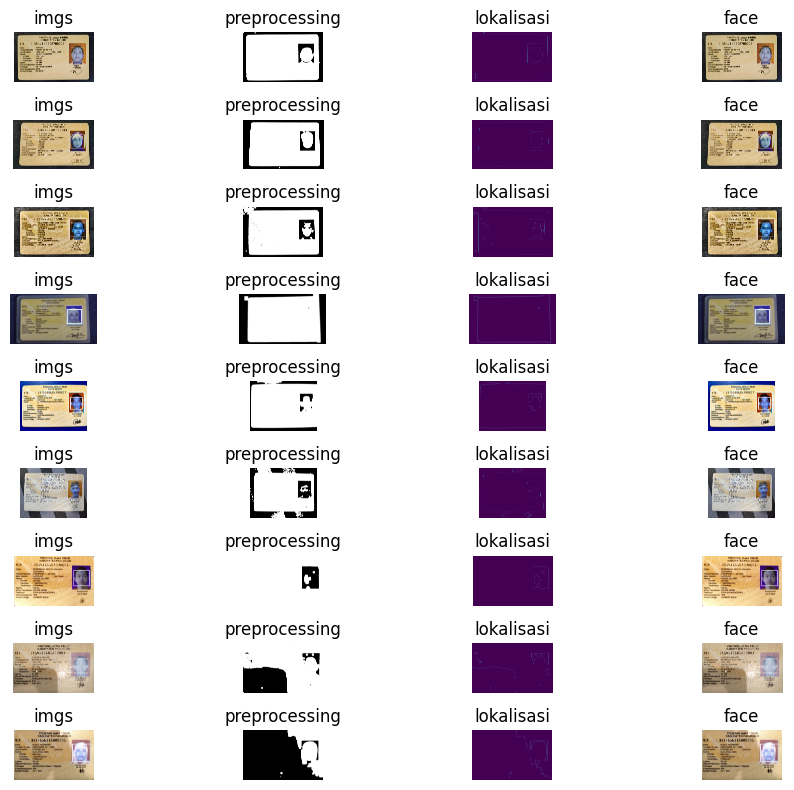

In [54]:
images_list = [imgs, preprocessing,lokalisasi, faces]
titles_list = ['imgs', 'preprocessing','lokalisasi', 'face']

show_multiple_images(images_list, titles_list)